# HDMSpectra Functionality

In this notebook we demonstrate the basic functionality of HDMSpectra, highlighting the different options available. Further examples can be found in the notebook "ReproducingPlots", where the plots in 2007.15001 are reproduced.

**NB:** `HDMSpectra` must to be installed before running these examples, otherwise the code below will fail at the point of loading `HDMSpectra`. Recall, the code can be installed by executing `python setup.py install` from the base directory. See the [README](https://github.com/nickrodd/HDMSpectra) for additional details.

In [4]:
from __future__ import print_function

%matplotlib inline
%load_ext autoreload
%autoreload 2

# Load HDMSpectra
from HDMSpectra import HDMSpectra

# Import numpy
import numpy as np
import scipy as scipy

# # Plotting defaults
import matplotlib as mpl
import matplotlib.pyplot as plt
# mpl.rcParams['text.usetex'] = True
# mpl.rcParams['font.family'] = 'serif' 
# mpl.rcParams['xtick.labelsize'] = 26
# mpl.rcParams['ytick.labelsize'] = 26
# mpl.rcParams['xtick.major.size'] = 5
# mpl.rcParams['xtick.minor.size'] = 2.5
# mpl.rcParams['xtick.major.width'] = 1.0
# mpl.rcParams['xtick.minor.width'] = 0.75
# mpl.rcParams['xtick.major.pad'] = 8
# mpl.rcParams['xtick.direction'] = 'in'
# mpl.rcParams['ytick.major.size'] = 5
# mpl.rcParams['ytick.minor.size'] = 2.5
# mpl.rcParams['ytick.major.width'] = 1.0
# mpl.rcParams['ytick.minor.width'] = 0.75
# mpl.rcParams['ytick.major.pad'] = 8
# mpl.rcParams['ytick.direction'] = 'in'
# mpl.rcParams['legend.fontsize'] = 26
# mpl.rcParams['legend.frameon'] = False

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Establish data location

The spectra themselves are stored within the `HDMSpectra.hdf5` file provided with the code. By default this is in the `data` directory, although the file can be moved as long as `HDMSpectra` is provided the appropriate path.

In [2]:
data = "../DarkMatter/external/HDMSpectra/data/HDMSpectra.hdf5"

## Example 1: Dark Matter Decay and Annihilation Spectra

The main workhorse of HDMSpectra is the function `spec`. We will explore its basic functionality in this example. To begin with, generating the photon spectrum from $\chi \to b \bar{b}$ for EeV DM is as simple as follows.

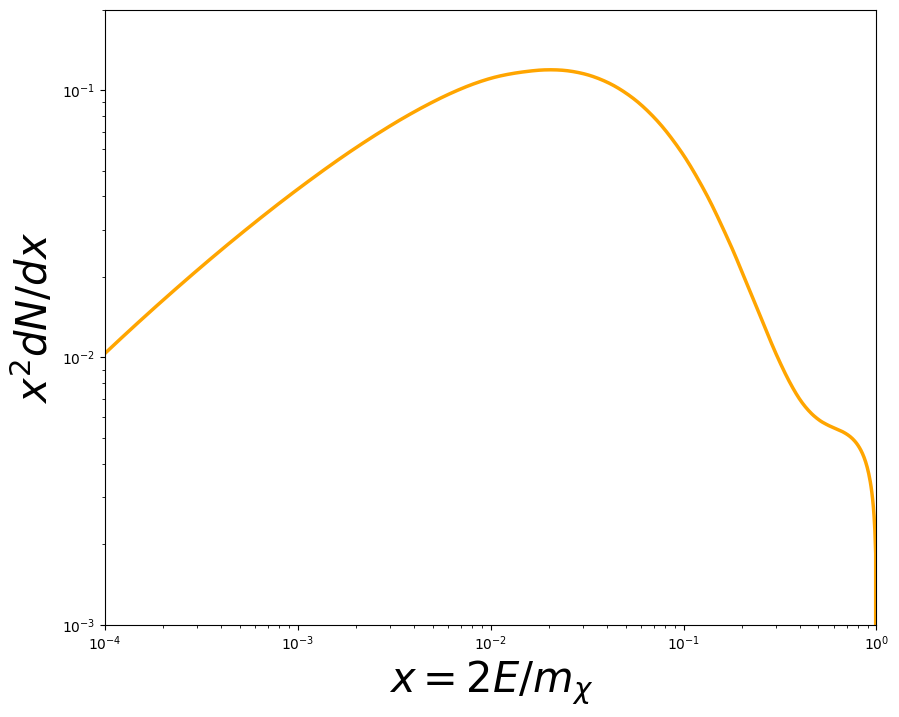

In [5]:
# Specify the particles
finalstate = 22 # pdg id of the photon
initialstate = 5 # pdg id of the b-quark
mDM = 1.e9 # dark matter mass in GeV, here 1 EeV
x = np.logspace(-4.,0.,1000) # Energy fraction values, x = 2E/mDM


# Extract the spectrum using HDMSpectra.spec
dNdx = HDMSpectra.spec(finalstate, initialstate, x, mDM, data)


# Plot the spectrum
fig, ax = plt.subplots(1, figsize=(10/1.1, 8/1.1))

plt.plot(x, x**2.*dNdx, 
         lw=2.5, c='orange')

plt.xscale('log')
plt.yscale('log')
plt.xlim([1.e-4,1.])
plt.ylim([1.e-3,2.e-1])
plt.xlabel(r"$x = 2E/m_{\chi}$", fontsize=30)
plt.ylabel(r"$x^2 dN/dx$", fontsize=30)

plt.tight_layout()
plt.show()

The above demonstrates the basic functionality of `spec`. In detail, the function has the following keywords and defaults.

| <p align="right">Argument | <p align="right">Default | <p align="right"> Purpose |
| ------------- | ------------- | ------------- |
| <p align="right">finalstate | <p align="right">- | <p align="center"> Stable Standard Model final state to determine the spectrum of  |
| <p align="right">X | <p align="right">- | <p align="center"> $X$ in $\chi \to X \bar{X}$ |
| <p align="right">xval | <p align="right">- | <p align="right">Array of energy fractions at which to determine the spectrum |
| <p align="right">mDM | <p align="right">- | <p align="right">Dark Matter mass [GeV] |
| <p align="right">data | <p align="right">- | <p align="right">Location of the `hdf5` file containing all the spectra |
| <p align="right">annihilation| <p align="right">False | <p align="right">Set to True for $\chi \chi \to X \bar{X}$ |
| <p align="right">Xbar | <p align="right">None | <p align="right">Manually specify $\bar{X}$, need not be the conjugate of $X$ |
| <p align="right">delta | <p align="right">False | <p align="right">Set to True to append the $\delta$-function coefficient |

The first five keywords, as used in the above example, are mandatory. In the rest on this notebook we will explore each of these keywords in detail, starting with `annihilation` in this section.

Before doing so, let us note an important caveat: **Both xval and mDM have an allowed range**
- xval can only be accessed in the range [$10^{-6}$, 1]. The upper bound is imposed by kinematics, whereas the lower bound is enforced as we do not trust the results of our calculation at smaller $x$. Even below $x \sim 10^{-4}$ our results can have significant uncertainty. For more details, see 2007.15001.
- mDM can only be accessed in the range [$10^3$, $10^{19}$] GeV (i.e. a TeV to the Planck scale). If `annihilation=True`, the lower boundary becomes 500 GeV. We do not go to lower masses as missing power corrections in our calculation become significant. For DM spectra below the TeV scale, we recommend using [PPPC4DMID](http://www.marcocirelli.net/PPPC4DMID.html) or [Pythia](http://home.thep.lu.se/~torbjorn/Pythia.html).

If values outside these ranges are specified, `spec` will return an error.

Let's now explore setting `annihilation=True`. This tells the code a desire to compute $\chi \chi \to X \bar{X}$ rather than $\chi \to X \bar{X}$, with energy fractions now specified by $x = E/m_{\chi}$ (rather than $2E/m_{\chi}$ for decay). In practice, the spectrum is identical to that of decay, but with twice the dark matter mass, as we now verify.

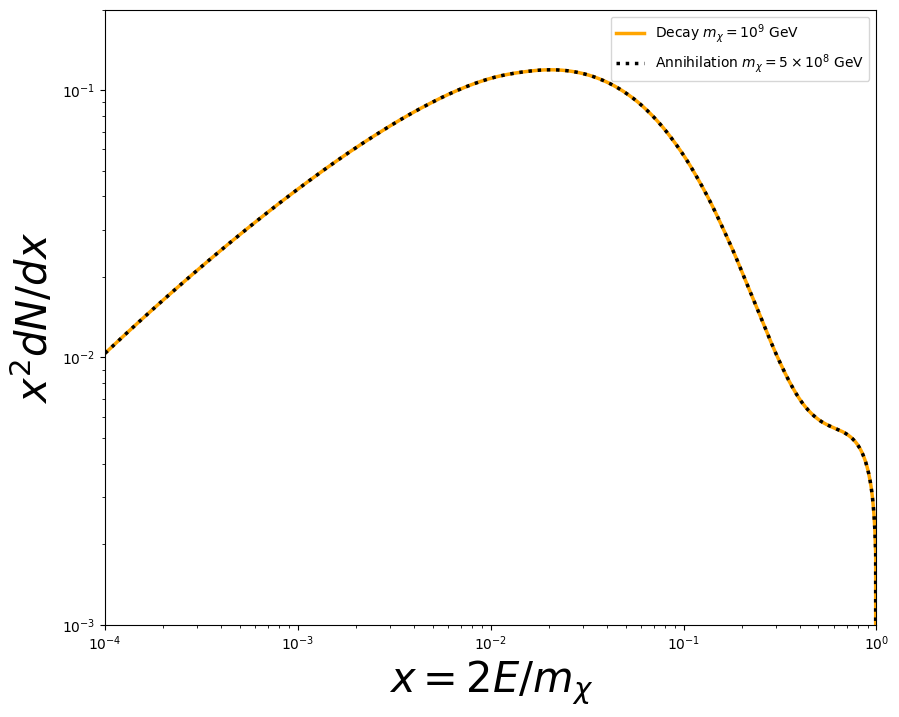

In [6]:
# We'll leave the basic arguments as above

finalstate = 22 
initialstate = 5 
mDM = 1.e9
x = np.logspace(-4.,0.,1000)


# Extract both spectra
dNdx_dec = HDMSpectra.spec(finalstate, initialstate, x, mDM, data)
dNdx_ann = HDMSpectra.spec(finalstate, initialstate, x, mDM/2., data, annihilation=True)


# Plot the spectrum
fig, ax = plt.subplots(1, figsize=(10/1.1, 8/1.1))

plt.plot(x, x**2.*dNdx_dec, 
         lw=2.5, c='orange', label=r'Decay $m_{\chi} = 10^9$ GeV')

plt.plot(x, x**2.*dNdx_ann, 
         lw=2.5, c='black',ls=':', label=r'Annihilation $m_{\chi} = 5 \times 10^8$ GeV')

plt.xscale('log')
plt.yscale('log')
plt.xlim([1.e-4,1.])
plt.ylim([1.e-3,2.e-1])
plt.xlabel(r"$x = 2E/m_{\chi}$", fontsize=30)
plt.ylabel(r"$x^2 dN/dx$", fontsize=30)
plt.legend()
plt.tight_layout()
plt.show()

## Example 2: Exploring Particle ID Inputs

Next we will explore the functionality of each of the keywords `finalstate` and `X` in turn.

Firstly, `finalstate` specifies which standard model stable particle to determine the spectrum of. The full list of available options are:
```
11, -11,                   # electron
12, -12, 14, -14, 16, -16, # neutrino
22,                        # photon
2212, -2212                # proton
```
These particles are specified by the relevant [pdg id](http://pdg.lbl.gov/2007/reviews/montecarlorpp.pdf) code. Alternatively, `finalstate` can be equally well specified by the following strings (where `a` denoted anti-particle):
```
'e', 'ae',                                         # electron
'nue', 'anue', 'numu', 'anumu', 'nutau', 'anutau', # neutrino
'gamma',                                           # photon
'p', 'ap'                                          # proton
```

The output for specifying the string of pdg id is identical.

In [7]:
initialstate = 5
mDM = 1.e9
x = 0.5

print(HDMSpectra.spec(22, initialstate, x, mDM, data))
print(HDMSpectra.spec('gamma', initialstate, x, mDM, data))

[0.02341701]
[0.02341701]


A similar set of options is provided to specify the initial state, $X$. In detail, the following list of pdg ids
```
1, 2, 3, 4, 5, 6,       # Q
11, 12, 13, 14, 15, 16, # L
21, 22, 23, 24,         # V
25                      # H
```
and string
```
'd', 'u', 's', 'c', 'b', 't',             # Q
'e', 'nue', 'mu', 'numu', 'tau', 'nutau', # L
'g', 'gamma', 'Z', 'W',                   # V
'h'                                       # H
```
is available.

By default it is assumed that the process is $\chi \to X \bar{X}$ (or if $X$ has no conjugate, as for the Higgs, then just $X X$). We will explore how to specify more general final states below, but for now note that if we set $X$ to be a particle of antiparticle we will get an identical result.

In [8]:
finalstate = 22
mDM = 1.e9
x = 0.5

print(HDMSpectra.spec(finalstate,  5, x, mDM, data))
print(HDMSpectra.spec(finalstate, -5, x, mDM, data))

[0.02341701]
[0.02341701]


Note this option is only available for the pdg, adding `a` to the front of the strings allowed for $X$ will return an error.

As our calculation starts in the full unbroken standard model, at the high scale it is also possible to specify the polarization or helicity of $X$. For the pdg ids this amounts to adding a prefix 19 for left handed/negative helicity, 29 for right handed/positive helicity, or 39 for a longitudinal polarization. This must be added so the pdg id is now a 4-digit number, e.g. a left-handed strange-quark is specified as `1903`. The full list of available options is now
```
1901, 1902, 1903, 1904, 1905, 1906, # Q_L
1911, 1912, 1913, 1914, 1915, 1916, # L_L
2901, 2902, 2903, 2904, 2905, 2906, # Q_R
2911, 2913, 2915,                   # L_R
1921, 1922, 1923, 1924,             # V_L
2921, 2922, 2923, 2924,             # V_R
3923, 3924,                         # V_0
25                                  # H
```

It is also possible to specify these at the level of string, by appending `L`, `R`, or `0`, e.g. a longitudinal $Z$ is specified by `Z0`.

By default, if no helicity/polarization is specified the spectrum returns the average of the available states. This is verified in the example below.

In [9]:
print(HDMSpectra.spec(22, 1905, x, mDM, data))
print(HDMSpectra.spec(22, 2905, x, mDM, data))
print((HDMSpectra.spec(22, 1905, x, mDM, data) + HDMSpectra.spec(22, 2905, x, mDM, data))/2.)
print(HDMSpectra.spec(22, 5, x, mDM, data))

[0.0262683]
[0.02056572]
[0.02341701]
[0.02341701]


## Example 3: Extracting a $\delta$-function coefficient

For certain states, such as $\chi \to \nu_e \bar{\nu}_e \to \nu_e$, there can be a significant $\delta$-function coefficient located at $x=1$, associated with the probability that there were no corrections to the initial hard process. In order to access this, `delta = True` should be set, in which case the delta function coefficient will be appended as the last element to the spectrum (if one exists, otherwise the code will append 0). For example,

In [10]:
mDM = 1.e9
x = 0.5

print(HDMSpectra.spec(22, 22, x, mDM, data))
print(HDMSpectra.spec(22, 22, x, mDM, data, delta=True))

[0.06304888]
[0.06304888 0.92546995]


The full list of states that have a non-zero $\delta$-function contribution that we compute are as follows:
- $e_L \to e$, $\bar{e}_L \to \bar{e}$
- $e_R \to e$, $\bar{e}_R \to \bar{e}$
- $\nu_e \to \nu_e$, $\bar{\nu}_e \to \bar{\nu}_e$
- $\nu_{\mu} \to \nu_{\mu}$, $\bar{\nu}_{\mu} \to \bar{\nu}_{\mu}$
- $\nu_{\tau} \to \nu_{\tau}$, $\bar{\nu}_{\tau} \to \bar{\nu}_{\tau}$
- $\gamma_L \to \gamma$, $\gamma_R \to \gamma$
- $Z_L \to \gamma$, $Z_R \to \gamma$

## Example 4: Spectra for $\chi \to X Y$, where $Y \neq \bar{X}$

As mentioned above, by default the spectrum is produced for $\chi \to X \bar{X}$. For certain models, a more general initial state may be desired. In that case $\bar{X}$ can be set manually, and need not be related to $X$. Note the same principles as above apply, if an unpolarized initial state is specified, the average of the polarizations is produced.

An example is provided below.

In [11]:
finalstate = 22
mDM = 1.e9
x = 0.5

print(HDMSpectra.spec(finalstate,  5, x, mDM, data))
print(HDMSpectra.spec(finalstate,  5, x, mDM, data, Xbar=-5))
print(HDMSpectra.spec(finalstate,  5, x, mDM, data, Xbar=11))

[0.02341701]
[0.02341701]
[0.1214471]


## Example 5: Obtaining explicit Fragmentation Functions

The explicit fragmentation functions used to compute the spectra themselves can also be accessed, but using a different function `HDMSpectra.FF`. If one was trying to study the evolution of a single emitted particle, these can be used. Also if the initial process of the decay/annihilation is more complicated than 2-body, the spectrum can be convolved with the relevant fragmentation functions as described in our paper. In detail, `FF` returns

$$D_i^j(x;\,Q, 0)$$

i.e. the evolution of a particle $i$ at a scale $\mu \sim Q$ into a state $j$ at $\mu \sim 0$, evolved at an energy fraction $x$. This is **not** the momentum weighted fragmentation function $d(x) = x\, D(x)$.


The keyword arguments of this function are

| <p align="right">Argument | <p align="right">Default | <p align="right"> Purpose |
| ------------- | ------------- | ------------- |
| <p align="right">finalstate | <p align="right">- | <p align="center"> Final state or $j$  |
| <p align="right">initialstate | <p align="right">- | <p align="center"> Initial state or $i$ |
| <p align="right">xval | <p align="right">- | <p align="right">Array of energy fractions at which to determine $D(x)$ |
| <p align="right">Q | <p align="right">- | <p align="right">Scale of $Q$ [GeV] |
| <p align="right">data | <p align="right">- | <p align="right">Location of the `hdf5` file containing all the spectra 
| <p align="right">delta | <p align="right">False | <p align="right">Set to True to append the $\delta$-function coefficient |

The functionality for the keywords mirrors that of `spec`.

As an example, we can reconstruct the spectrum from two fragmentation functions as follows.

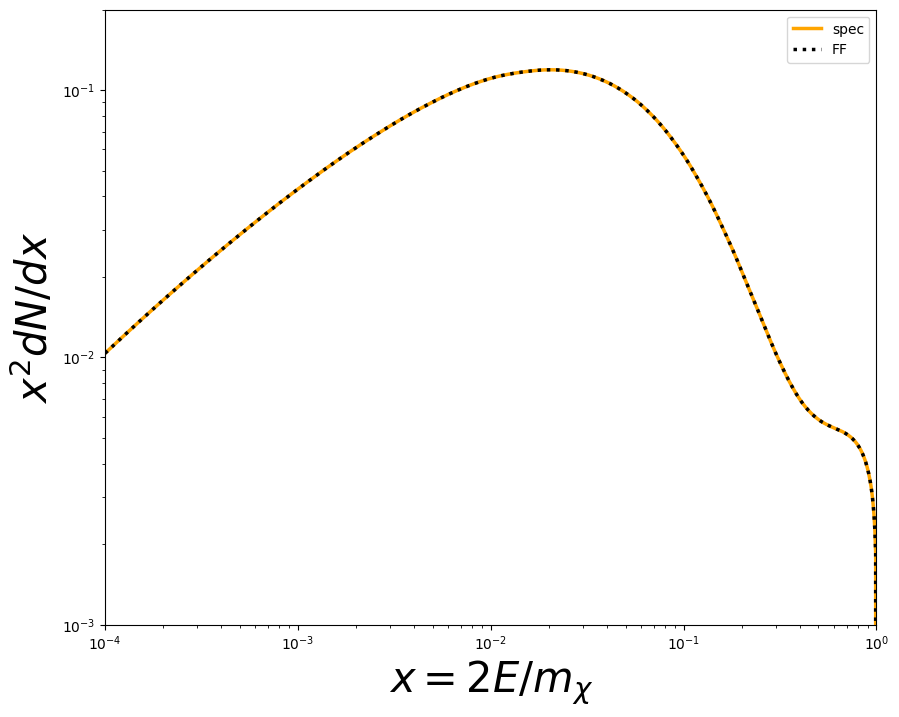

In [12]:
finalstate = 22 
mDM = 1.e9
x = np.logspace(-4.,0.,1000)


# Extract the spectra
dNdx = HDMSpectra.spec(finalstate, 5, x, mDM, data)

# Extract the FF, note these are sampled at Q = mDM/2 for decay
FF1 = HDMSpectra.FF(finalstate, 5, x, mDM/2., data)
FF2 = HDMSpectra.FF(finalstate, -5, x, mDM/2., data)

# Plot the spectrum
fig, ax = plt.subplots(1, figsize=(10/1.1, 8/1.1))

plt.plot(x, x**2.*dNdx, 
         lw=2.5, c='orange', label=r'spec')

plt.plot(x, x**2.*(FF1+FF2), 
         lw=2.5, c='black',ls=':', label=r'FF')

plt.xscale('log')
plt.yscale('log')
plt.xlim([1.e-4,1.])
plt.ylim([1.e-3,2.e-1])
plt.xlabel(r"$x = 2E/m_{\chi}$", fontsize=30)
plt.ylabel(r"$x^2 dN/dx$", fontsize=30)
plt.legend()
plt.tight_layout()
plt.show()

[0.00542752 0.88945079]


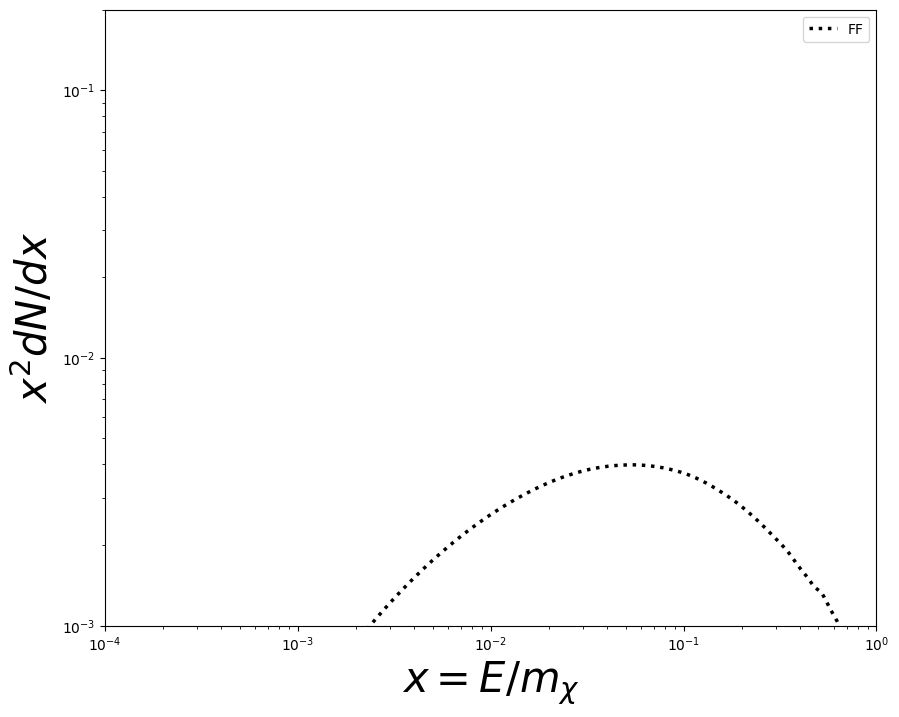

In [13]:
finalstate = 22
mDM = 3*1.e3
x = np.logspace(-4.,0.,1000)



# Extract the FF, note these are sampled at Q = mDM/2 for decay
FF1 = HDMSpectra.FF(finalstate, 22, x, mDM, data)
#FF2 = HDMSpectra.FF(finalstate, -5, x, mDM/2., data)

print(HDMSpectra.FF(finalstate, 22, 0.5, mDM, data, delta=True))

# Extract the spectra
#dNdx = HDMSpectra.spec(finalstate, 5, x, mDM, data)

# Plot the spectrum
fig, ax = plt.subplots(1, figsize=(10/1.1, 8/1.1))

#plt.plot(x, x**2.*dNdx, 
#         lw=2.5, c='orange', label=r'spec')

plt.plot(x, x**2.*FF1, 
         lw=2.5, c='black',ls=':', label=r'FF')

plt.xscale('log')
plt.yscale('log')
plt.xlim([1.e-4,1.])
plt.ylim([1.e-3,2.e-1])
plt.xlabel(r"$x = E/m_{\chi}$", fontsize=30)
plt.ylabel(r"$x^2 dN/dx$", fontsize=30)
plt.legend()
plt.tight_layout()
plt.show()

1.0 100
0.0005981016334598592
ibi sum 0.8894507928773456


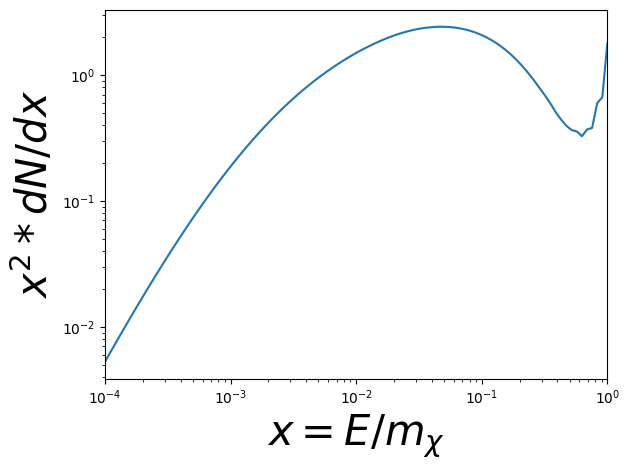

NameError: name 'F_vectorized' is not defined

In [15]:
%%time

lx = np.logspace(-4.,0.,100)

mw = 0.0804
Mchi = 3.
Lchi = np.log(mw/(2*Mchi))
alphaw = 3.35e-2
alphawT = alphaw/(4*np.pi)
sinThW = 0.2313**0.5
cosThW = np.sqrt(1 - sinThW**2)
v = 2.e-4
spm = 5.05
s00 = 3.34
F0 = 4*s00**2/3 + 2 * spm**2 + 2*2**0.5/3 *2*(s00*spm)
F1 = -4*s00**2/3 - 2 * spm**2 + 2*2**0.5/3 *2*(s00*spm)
sigTree = np.pi * alphaw**2 * sinThW**2/(2 * Mchi**2 * v)
sigWW = 2 * np.pi * alphaw**2 / (Mchi**2 * v) 
CA = 2
Gamma0 = 4*CA
cm3sFact = 1.17e-23
sigLineHat = sigTree * np.exp(-2 * Gamma0 * alphawT * Lchi**2)
sigLine = 2 * spm**2 * sigLineHat

def LJ(z):
    return np.log(mw/(2*Mchi*(1-z)**0.5))
def LS(z):
    return np.log(mw/(2*Mchi*(1-z)))
def ThJ(z):
    return np.heaviside(1-mw**2/(4*Mchi**2)-z,1.)
def ThS(z):
    return np.heaviside(1-mw/(2*Mchi)-z,1.)
def LLJ1(z):
    return LJ(z)*ThJ(z)/(1-z)
def LLS1(z):
    return LS(z)*ThS(z)/(1-z)


def dsigdzFin(z):
    if(z != 1):
        return ( cm3sFact * 4 * sigTree * np.exp(-2 * Gamma0 * alphawT * Lchi**2) * (CA * alphawT * F1 * 
                                                             (3 * LLS1(z) - 2 * LLJ1(z))
        * np.exp(2 * Gamma0 * alphawT * (ThJ(z) * LJ(z)**2 - 3/4 * ThS(z) * LS(z)**2))
        - 2 * CA * alphawT * F0 * LLJ1(z) * np.exp(2 * Gamma0 * alphawT * LJ(z)**2)) )
    else:
        return 0

#Units of 1/GeV    
def dNdEend(E):
    z = E/Mchi
    if(z != 1):
        return ( 4 * sigTree * np.exp(-2 * Gamma0 * alphawT * Lchi**2) * (CA * alphawT * F1 * 
                                                             (3 * LLS1(z) - 2 * LLJ1(z))
        * np.exp(2 * Gamma0 * alphawT * (ThJ(z) * LJ(z)**2 - 3/4 * ThS(z) * LS(z)**2))
        - 2 * CA * alphawT * F0 * LLJ1(z) * np.exp(2 * Gamma0 * alphawT * LJ(z)**2)) ) / (1000 * Mchi * sigLine)
    else:
        return 0

#print(dNdEend(2.))    
    
from scipy.integrate import quad
#from math import sqrt
def f(z,x): 
    return 1/z*dsigdzFin(z)*HDMSpectra.FF(finalstate, 22, x/z, mDM, data) 

F = lambda x: x**2 * (quad(f, x, 1, args=(x,))[0] + cm3sFact * 4 * spm**2 * sigTree 
               * np.exp(-2 * Gamma0 * alphawT * Lchi**2) 
                      * (HDMSpectra.FF(finalstate, 22, x, mDM, data)+ cosThW**2/sinThW**2 * HDMSpectra.FF(finalstate, 23, x, mDM, data)) 
                      + cm3sFact * (s00**2 + np.sqrt(2)*s00*spm + spm**2/2) * sigWW * HDMSpectra.FF(finalstate, 24, x, mDM, data))

#Units of 1/GeV
def dNdEtot(E): 
    x = E/Mchi
    if(x>0 and x<1):
        return (quad(f, x, 1, args=(x,))[0] + cm3sFact * 4 * spm**2 * sigTree 
               * np.exp(-2 * Gamma0 * alphawT * Lchi**2) 
                      * (HDMSpectra.FF(finalstate, 22, x, mDM, data)+ cosThW**2/sinThW**2 * HDMSpectra.FF(finalstate, 23, x, mDM, data)) 
                      + cm3sFact * (s00**2 + np.sqrt(2)*s00*spm + spm**2/2) * sigWW * HDMSpectra.FF(finalstate, 24, x, mDM, data)) / (1000 * Mchi * sigLine * cm3sFact)
    elif(x==1.):
        return (cm3sFact * 4 * spm**2 * sigTree 
               * np.exp(-2 * Gamma0 * alphawT * Lchi**2) 
                      * (HDMSpectra.FF(finalstate, 22, x, mDM, data, delta=True)[1] + cosThW**2/sinThW**2 * HDMSpectra.FF(finalstate, 23, x, mDM, data, delta=True)[1]) 
                      + cm3sFact * (s00**2 + np.sqrt(2)*s00*spm + spm**2/2) * sigWW * HDMSpectra.FF(finalstate, 24, x, mDM, data, delta=True)[1]) / (1000 * Mchi * sigLine * cm3sFact)
    else:
        return 0
    
    
    

print(lx[len(lx)-1],len(lx))

print(dNdEtot(Mchi*lx[len(lx)-1]))


print("ibi sum",HDMSpectra.FF(finalstate, 22, 1.0, mDM, data, delta=True)[1])    
    
#F_vectorized = np.vectorize(F)
dNdE_vectorized = np.vectorize(dNdEtot)

# for i in range(len(lx)):
#     print(lx[i],F_vectorized(lx[i])[0])

plt.plot(lx, lx**2 * 1000 * Mchi* dNdE_vectorized(Mchi*lx))


plt.xscale('log')
plt.xlim([1.e-4,1.])
plt.yscale('log')
# plt.ylim([1.e-6,5.e-1])
plt.xlabel(r"$x = E/m_{\chi}$", fontsize=30)
plt.ylabel(r"$x^2 * dN/dx$", fontsize=30)
plt.tight_layout() 
fig1 = plt.gcf()
plt.show()
#fig1.set_size_inches(8,6)
fig1.savefig('testRate.pdf')

np.savetxt('dNdE3000.csv',  np.transpose([lx, dNdE_vectorized(Mchi*lx)]))
#np.savetxt('data.csv', (col1_array, col2_array, col3_array), delimiter=',')

def simpsons_rule(points):
    """
    Integrates a list of two-dimensional points using Simpson's rule.
    
    Assumes that the first element of each point corresponds to the x value and the second element
    corresponds to the y value.
    
    Assumes that the spacing between the x values is not uniform.
    """
    n = len(points)
    if n % 2 == 0:
        raise ValueError("Number of points must be odd for Simpson's rule")
    
    x_values, y_values = zip(*points)
    h_values = np.diff(x_values)
    if np.any(h_values <= 0):
        raise ValueError("Points must be sorted in increasing order of x values")
    
    # Integrate using Simpson's rule
    h_sum = np.sum(h_values[1::2])
    area = (h_sum / 3.0) * (y_values[0] + 4*np.sum(y_values[1::2]) + 2*np.sum(y_values[2:-1:2]) + y_values[-1])
    
    return area

# Example usage

points = []
for i in range(len(lx)):
    points.append([lx[i],F_vectorized(lx[i])[0]])
        
#points = [(0, 0), (1, 1), (2, 4), (3, 9), (4, 16), (5, 25)]

print(points[-2:])

integral = simpsons_rule(points)
print(integral)

In [17]:
a = dNdE_vectorized(Mchi*lx)

In [27]:
finalstate

22

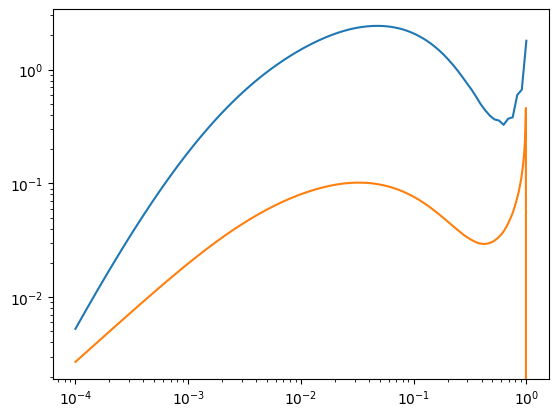

In [48]:
plt.plot(lx, lx**2 * 1000 * Mchi* a)

finalstate = 22 # pdg id of the photon
initialstate = 5 # pdg id of the b-quark
mDM = 1.e9 # dark matter mass in GeV, here 1 EeV
x = np.logspace(-4.,0.,1000) # Energy fraction values, x = 2E/mDM


# Extract the spectrum using HDMSpectra.spec
dNdx = HDMSpectra.spec(22, 24, x, mDM/2, annihilation=True, data=data)
plt.plot(x, x**2*dNdx)
plt.xscale("log")
plt.yscale("log")